In [0]:
!pip install biopython

     |████████████████████████████████| 3.2 MB 5.9 MB/s 
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4dfa4bfd-f200-4844-bf54-51ad051779d2/bin/python -m pip install --upgrade pip' command.


In [0]:
pip install biopython --upgrade

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# Importando a biblioteca Seq da Biopython
from Bio.Seq import Seq
from Bio.SeqUtils import molecular_weight
from Bio.SeqUtils import MeltingTemp as mt
import numpy as np
from Bio.SeqUtils import molecular_weight, MeltingTemp as mt

# Exemplo de sequência de DNA
dna_seq = Seq("ATGGCCATTCGCAAGGGTGCCCGATAG")

# Transcrição para RNA
rna_seq = dna_seq.transcribe()

# Métricas de sequência
dna_length = len(dna_seq)
gc_content = 100 * float(dna_seq.count("G") + dna_seq.count("C")) / dna_length

# Exibir informações sobre a sequência
print(f"Sequência de DNA: {dna_seq}")
print(f"Sequência de RNA transcrita: {rna_seq}")
print(f"Comprimento do DNA: {dna_length}")
print(f"GC Content: {gc_content}%")


Sequência de DNA: ATGGCCATTCGCAAGGGTGCCCGATAG
Sequência de RNA transcrita: AUGGCCAUUCGCAAGGGUGCCCGAUAG
Comprimento do DNA: 27
GC Content: 59.25925925925926%


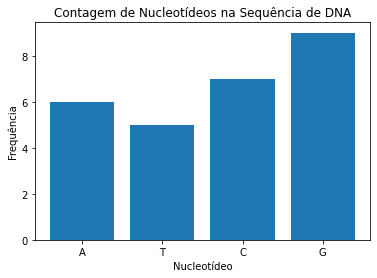

In [0]:
import matplotlib.pyplot as plt

# Contagem de nucleotídeos
nucleotideos = ['A', 'T', 'C', 'G']
contagem = [dna_seq.count(n) for n in nucleotideos]

# Criando um gráfico de barras
plt.bar(nucleotideos, contagem)
plt.title("Contagem de Nucleotídeos na Sequência de DNA")
plt.xlabel("Nucleotídeo")
plt.ylabel("Frequência")
plt.show()


In [0]:
# Adicionando um widget para entrada da sequência de DNA
dbutils.widgets.text("Sequência", "ATGGCCATTCGCAAGGGTGCCCGATAG", "Sequência de DNA")
sequencia = dbutils.widgets.get("Sequência")

# Processando a sequência de DNA inserida pelo usuário
dna_seq_widget = Seq(sequencia)
rna_seq_widget = dna_seq_widget.transcribe()

# Exibindo a sequência de DNA e RNA
print(f"DNA: {dna_seq_widget}")
print(f"RNA Transcrito: {rna_seq_widget}")

# Visualizando o conteúdo de GC
gc_content_widget = 100 * float(dna_seq_widget.count("G") + dna_seq_widget.count("C")) / len(dna_seq_widget)
print(f"GC Content: {gc_content_widget}%")


DNA: ATGGCCATTCGCAAGGGTGCCCGATAG
RNA Transcrito: AUGGCCAUUCGCAAGGGUGCCCGAUAG
GC Content: 59.25925925925926%


Métricas de DNA e RNA -> calcular a massa molecular de uma sequência de DNA com base nos nucleotídeos que a compõem.

In [0]:


# Cálculo da massa molecular
massa_dna = molecular_weight(dna_seq)
print(f"Massa Molecular do DNA: {massa_dna} Da")


Massa Molecular do DNA: 8405.346 Da


In [0]:
#Codificação de Proteínas
#Utilizando o código genético, você pode traduzir uma sequência de DNA/RNA para uma sequência de aminoácidos (proteína).

# Traduzindo a sequência de DNA para proteína
proteina = dna_seq.translate()
print(f"Proteína codificada: {proteina}")


Proteína codificada: MAIRKGAR*


In [0]:
#Calcular Melting Temperature (Tm)
#A temperatura de fusão (Tm) de uma sequência de DNA depende do número de pares de nucleotídeos GC e AT.
# Cálculo da temperatura de fusão
tm = mt.Tm_Wallace(dna_seq)
print(f"Temperatura de Fusão (Tm): {tm} °C")

Temperatura de Fusão (Tm): 86.0 °C


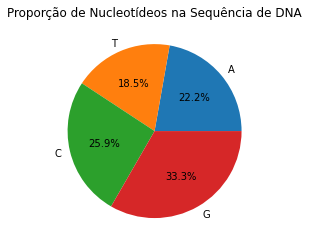

In [0]:
# Frequência de nucleotídeos
frequencias = [dna_seq.count(n) for n in nucleotideos]

# Gráfico de pizza
plt.pie(frequencias, labels=nucleotideos, autopct='%1.1f%%')
plt.title("Proporção de Nucleotídeos na Sequência de DNA")
plt.show()


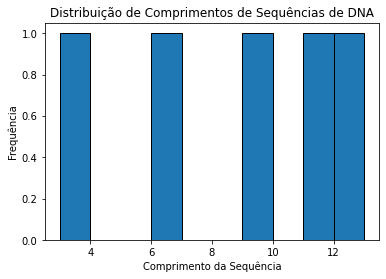

In [0]:
#Distribuição de Comprimentos de Sequências
#Se você tiver várias sequências de DNA/RNA, pode calcular a distribuição de comprimentos e exibir isso em um histograma.

# Exemplo de lista de sequências de DNA
seqs = [Seq("ATGGCC"), Seq("ATGGCCATG"), Seq("ATGGCCATTCG"), Seq("ATG"), Seq("ATGGCCATTCGCA")]

# Calculando os comprimentos das sequências
comprimentos = [len(seq) for seq in seqs]

# Plotando um histograma de comprimentos de sequência
plt.hist(comprimentos, bins=np.arange(min(comprimentos), max(comprimentos) + 1, 1), edgecolor='black')
plt.title("Distribuição de Comprimentos de Sequências de DNA")
plt.xlabel("Comprimento da Sequência")
plt.ylabel("Frequência")
plt.show()

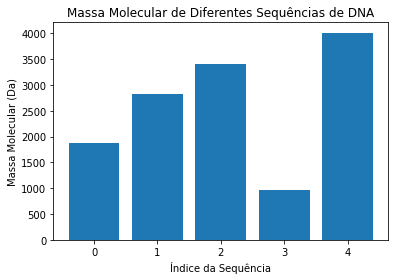

In [0]:
# Massa molecular de cada sequência
massas = [molecular_weight(seq) for seq in seqs]

# Gráfico de barras comparando a massa molecular
plt.bar(range(len(seqs)), massas)
plt.title("Massa Molecular de Diferentes Sequências de DNA")
plt.xlabel("Índice da Sequência")
plt.ylabel("Massa Molecular (Da)")
plt.show()

encapsulamento das análises em funções personalizadas

In [0]:
def analise_sequencia(dna):
    """Função para calcular e exibir análises de uma sequência de DNA"""
    
    # Exibir sequência de DNA e RNA
    rna = dna.transcribe()
    proteina = dna.translate()
    print(f"DNA: {dna}")
    print(f"RNA: {rna}")
    print(f"Proteína: {proteina}")
    
    # Calcular métricas
    comprimento = len(dna)
    gc_content = 100 * float(dna.count("G") + dna.count("C")) / comprimento
    massa = molecular_weight(dna)
    tm = mt.Tm_Wallace(dna)
    
    # Exibir resultados
    print(f"Comprimento: {comprimento} nucleotídeos")
    print(f"GC Content: {gc_content}%")
    print(f"Massa Molecular: {massa} Da")
    print(f"Temperatura de Fusão (Tm): {tm} °C")
    
    return gc_content, massa, tm

# Exemplo de uso
dna_exemplo = Seq("ATGGCCATTCGCAAGGGTGCCCGATAG")
analise_sequencia(dna_exemplo)

DNA: ATGGCCATTCGCAAGGGTGCCCGATAG
RNA: AUGGCCAUUCGCAAGGGUGCCCGAUAG
Proteína: MAIRKGAR*
Comprimento: 27 nucleotídeos
GC Content: 59.25925925925926%
Massa Molecular: 8405.346 Da
Temperatura de Fusão (Tm): 86.0 °C
Out[17]: (59.25925925925926, 8405.346, 86.0)

In [0]:
# Adicionar widgets para entrada de uma sequência
dbutils.widgets.text("Sequência de DNA", "ATGGCCATTCGCAAGGGTGCCCGATAG", "Digite uma sequência de DNA")
dna_input = dbutils.widgets.get("Sequência de DNA")

# Processar a sequência
dna_seq_widget = Seq(dna_input)
gc_content_widget, massa_widget, tm_widget = analise_sequencia(dna_seq_widget)

# Exibir métricas
print(f"Métrica da sequência inserida:")
print(f"GC Content: {gc_content_widget}%")
print(f"Massa Molecular: {massa_widget} Da")
print(f"Temperatura de Fusão: {tm_widget} °C")


DNA: ATGGCCATTCGCAAGGGTGCCCGATAG
RNA: AUGGCCAUUCGCAAGGGUGCCCGAUAG
Proteína: MAIRKGAR*
Comprimento: 27 nucleotídeos
GC Content: 59.25925925925926%
Massa Molecular: 8405.346 Da
Temperatura de Fusão (Tm): 86.0 °C
Métrica da sequência inserida:
GC Content: 59.25925925925926%
Massa Molecular: 8405.346 Da
Temperatura de Fusão: 86.0 °C
